In [275]:
import os,tables,numpy as np,matplotlib.pyplot as plt,pandas as pd
from scipy.io import loadmat
from collections import Counter
import h5py,glob

For abcdef :
Normal = -1 -> 0 
Abnormal = 1 

For g / Compare :
Normal = 0
Abnormal = 1(mild), 2(severe)

In [103]:
path = 'folds_phys_compare_pascal/'
folds = [x for x in os.listdir(path) if x.endswith('mat')]

In [2]:
class Data():
    def __init__(self,data,f,n):
        print(list(data.keys()))
        self.data = data
        self.file = f
        self.dom = n
        self.trainX = self.data['trainX']
        self.trainY = self.data['trainY'][:][0]
        self.valX = None
        self.valY = None
        self.normfiles, self.abnormfiles = self.parts()
        #print(self.normfiles,self.abnormfiles)
        if(f[:3]=='com'):
            self.trainY[self.trainY>0] = 1
            self.valX = self.data['valX']
            self.valY = self.data['valY'][:][0]
            self.valY[self.valY>0] = 1
        elif(f[:3]=='pas'):
            self.trainY[self.trainY<0] = 0
        else:
            self.trainY[self.trainY<0] = 0
        #print(Counter(self.trainY))
        self.normal = Counter(self.trainY)[0]
        self.abnormal = Counter(self.trainY)[1]
        self.total = self.normal+self.abnormal
    def parts(self):
        y = 0
        nn = 0
        ab = 0
        #print(self.data['train_parts'][0])
        for x in self.data['train_parts'][0]:
            #print(len(self.trainY[y:y+int(x)]),self.trainY[y:y+int(x)])
            if(sum(self.trainY[y:y+int(x)])>0):
                ab = ab + 1
            else: nn = nn +1 
            y = int(x)+y
        print(nn+ab,nn,ab)
        return nn,ab
    def pie(self):
        colors = ['gold','lightskyblue']
        explode = (0.07, 0)
        size = [self.normal,self.abnormal]
        labels = ['N', 'Ab']
        plt.pie(size,labels=labels,colors = colors,startangle=140,explode=explode,
               shadow=True,autopct=self.value)
        plt.title(self.dom)
    def value(self,val):
        return int(self.total*val/100)

a compare.mat
['trainX', 'trainY', 'train_files', 'train_parts', 'valX', 'valY', 'val_files', 'val_parts']
502 84 418
b fold_a.mat
['trainX', 'trainY', 'train_files', 'train_parts']
392 116 276
c fold_b.mat
['trainX', 'trainY', 'train_files', 'train_parts']
368 295 73
d fold_c.mat
['trainX', 'trainY', 'train_files', 'train_parts']
27 7 20
e fold_d.mat
['trainX', 'trainY', 'train_files', 'train_parts']
52 26 26
f fold_e.mat
['trainX', 'trainY', 'train_files', 'train_parts']
1925 1779 146
g fold_f.mat
['trainX', 'trainY', 'train_files', 'train_parts']
107 77 30
h pascalA.mat
['#refs#', '#subsystem#', 'file_name', 'states', 'trainX', 'trainY', 'train_parts']
64 31 33
i pascalB.mat
['#refs#', '#subsystem#', 'file_name', 'states', 'trainX', 'trainY', 'train_parts']
219 155 64


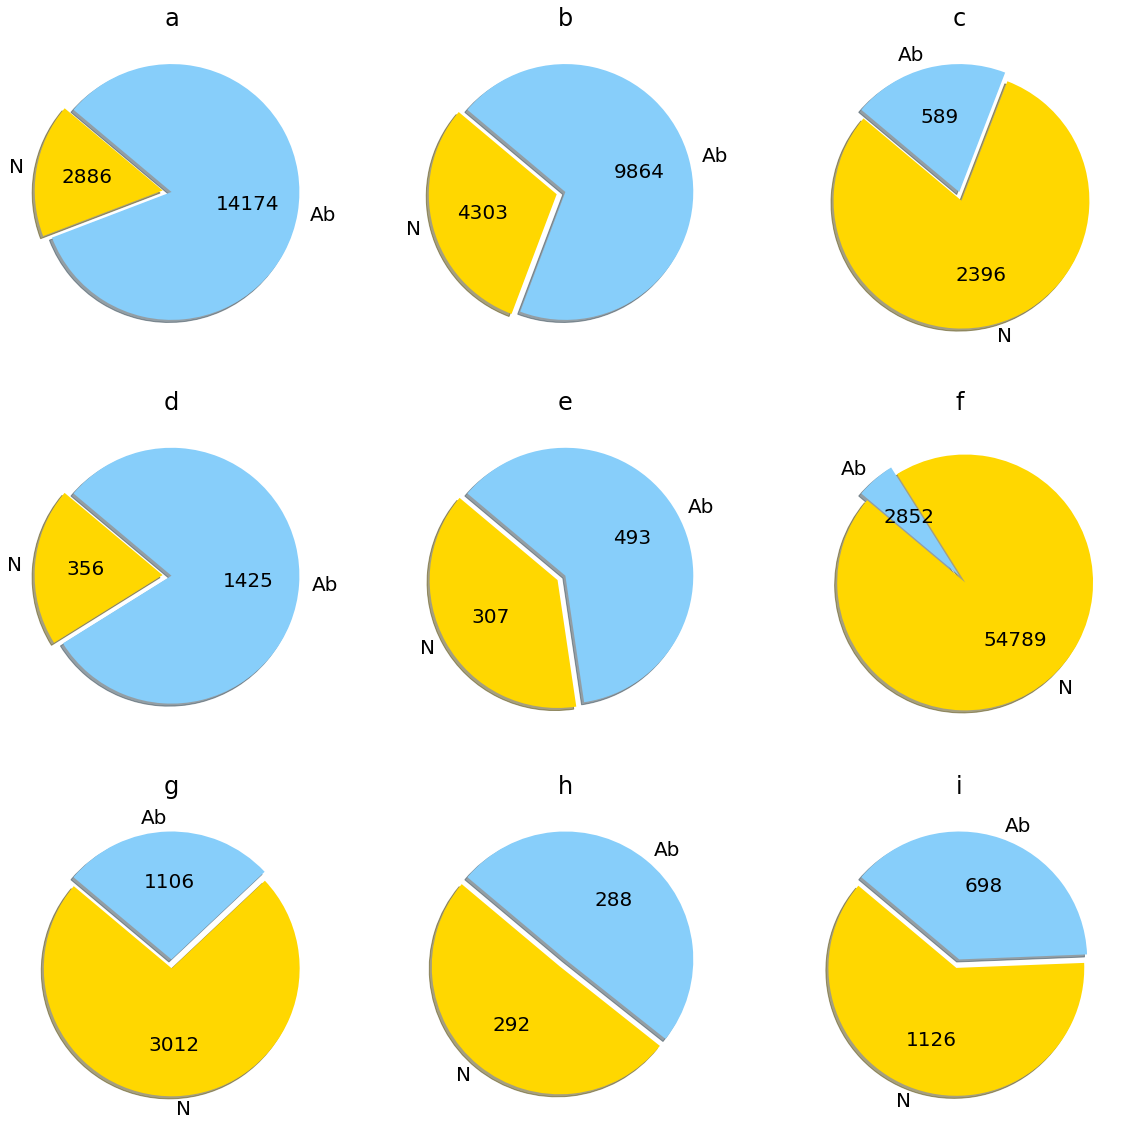

In [268]:
data = {}
dataname = {}
plt.figure(figsize=(20,20))
for i,(n,f) in enumerate(zip('abcdefghi',folds)):
    print(n,f)
    dataname[n]=f
    data[n] = Data(h5py.File(path+f, 'r'),f,n)
    plt.subplot(3,3,i+1)
    data[n].pie()

In [73]:
data['f'].normal,data['f'].abnormal

(54790, 2852)

In [74]:
data_notation = 'abcdefghi'
norm = [data[n].normal for n in data_notation]
ab = [data[n].abnormal for n in data_notation]
labels =['N'+x for x in data_notation]
labels = labels + ['A'+x for x in data_notation]
explode = list(np.ones(len(labels))/10)
#len(norm+ab),len(labels),explode

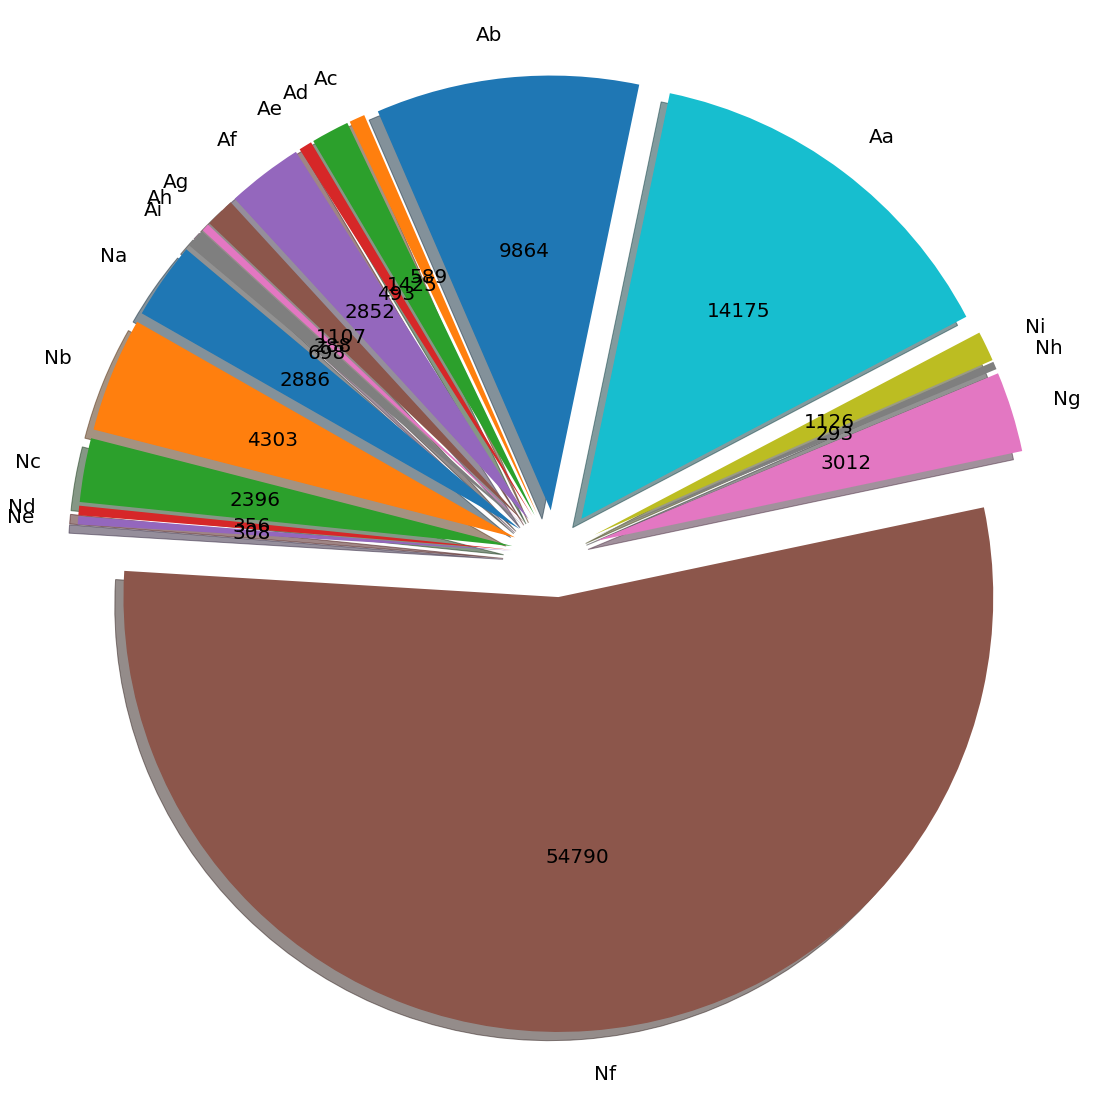

In [75]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
plt.figure(figsize=(20,20))
plot = plt.pie(norm+ab,labels=labels,startangle=140,shadow=True,explode=explode,autopct=autopct_format(norm+ab))

In [61]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

In [354]:
data_notation = 'abcdefghi'
asdadf = 0
df = []
col = ["Exclude",
       "Train N Cycles","Train Ab Cycles",
       "Train N Files","Train Ab Files",
       "Train N %","Train Ab %",
       "Test N Cycles","Test Ab Cycles",
       "Test N Files","Test Ab Files",
       "Test N %","Test AbN %"]


for i in 'abcdefghi':
    f1 = data_notation.replace(i,'')
    for j in data_notation['abcdefghi'.find(i):].replace(i,''):
        f2 = f1.replace(j,'')
        for k in f1['abcdefghi'.find(j):].replace(j,''):
            f3 = f2.replace(k,'')
            norm = [data[n].normal for n in f3]
            ab = [data[n].abnormal for n in f3]
            np = sum(norm)/(sum(norm+ab))
            normfiles = sum([data[n].normfiles for n in f3])
            abnormfiles = sum([data[n].abnormfiles for n in f3])
            #print(i,j,np)
            ii = dataname[i][:-4]
            ii = ii.ljust(7,' ')
            jj = dataname[j][:-4]
            jj = jj.ljust(7,' ')
            kk = dataname[k][:-4]
            kk = kk.ljust(7,' ')
            
            if (np>.30 and np<.70):
                testNorm = sum([data[t].normal for t in [i,j,k] if t is not 'f'])
                testAb = sum([data[t].abnormal for t in [i,j,k] if t is not 'f'])
                tsNf = sum([data[t].normfiles for t in [i,j,k] if t is not 'f'])
                tsAf = sum([data[t].abnormfiles for t in [i,j,k] if t is not 'f'])
                N = int(100*testNorm/(testNorm+testAb))
                Ab = 100 - N
                df.append([(ii,jj,kk),sum(norm),sum(ab),normfiles,abnormfiles,int(np*100),100-int(np*100),
                          testNorm,testAb,tsNf,tsAf,N,Ab])
                #print(ii,jj,kk,' Normal(',sum(norm),",",normfiles,') ', int(np*100),'% - ' ,100-int(np*100),
                      #'% (',sum(ab),",",abnormfiles,") Abnormal")

In [355]:
dff = pd.DataFrame(df,columns = col)
dff.set_index('Exclude')

,Train N Cycles,Train Ab Cycles,Train N Files,Train Ab Files,Train N %,Train Ab %,Test N Cycles,Test Ab Cycles,Test N Files,Test Ab Files,Test N %,Test AbN %
Exclude,,,,,,,,,,,,
"(compare, fold_a , fold_e )",7491,4600,591,246,61,39,7189,24039,200,694,23,77
"(compare, fold_b , fold_e )",9398,13875,412,449,40,60,5282,14764,379,491,26,74
"(compare, fold_c , fold_e )",11438,13039,700,502,46,54,3242,15600,91,438,17,83
"(compare, fold_d , fold_e )",11486,13971,681,496,45,55,3194,14668,110,444,17,83
"(compare, fold_e , fold_f )",8782,13357,630,492,39,61,5898,15282,161,448,27,73
"(compare, fold_e , pascalA)",11501,14176,676,489,44,56,3179,14463,115,451,18,82
"(compare, fold_e , pascalB)",10668,13766,552,458,43,57,4012,14873,239,482,21,79
"(fold_a , fold_b , fold_e )",7981,18186,380,591,30,70,6699,10453,411,349,39,61
"(fold_a , fold_c , fold_e )",10021,17350,668,644,36,64,4659,11289,123,296,29,71


In [358]:
dff.to_csv('balanceddatafold.csv',index=False)

In [48]:
for c in 'abcdefg':
    print(data[c].file,data[c].normal,data[c].abnormal)

compare.mat 2886 14175
fold_a.mat 4303 9864
fold_b.mat 2396 589
fold_c.mat 356 1425
fold_d.mat 308 493
fold_e.mat 54790 2852
fold_f.mat 3012 1107


In [12]:
k = list(feat.keys())

['trainX',
 'trainY',
 'train_files',
 'train_parts',
 'valX',
 'valY',
 'val_files',
 'val_parts']

In [4]:
class wow:
    def __init__(self):
        print("Init")
    def kop(self,v):
        print("Kop ", v)

In [5]:
w = wow()
w.kop(6)

Init
Kop  6


In [ ]:
class now(wow):
    def __init__(self):
        super

In [6]:
import tensorflow as tf

In [7]:
summary = tf.Summary()

In [14]:
summary.FromStringm(name='ra',tensor = tf.constant("wowowoww"))

AttributeError: text

In [13]:
summary.

0